**AMAZON ALEXA REVIEWS**

The Amazon Alexa Reviews dataset is a collection of customer reviews for various Alexa-enabled devices, such as the Echo, Echo Dot, and Fire TV Stick.

This dataset provides valuable insights into customer sentiment, product features, and potential areas for improvement.  

Key Features:

Customer Reviews: Includes textual reviews expressing users' opinions, experiences, and feedback on the Alexa devices.  
Star Ratings: Quantitative ratings (1-5 stars) indicating overall satisfaction levels.  
Product Variants: Identifies specific product models or variations (e.g., Echo, Echo Dot, Fire TV Stick).  
Date of Review: Timestamps for when the reviews were submitted.  
Potential Use Cases:

Sentiment Analysis: Analyzing the sentiment expressed in the reviews to gauge customer satisfaction and identify common themes.  
Product Feature Analysis: Identifying frequently mentioned features and their impact on customer satisfaction.
Customer Feedback Analysis: Understanding customer concerns, suggestions, and requests for improvements.
Machine Learning: Training models for tasks like sentiment classification, topic modeling, and text generation.

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/PROJECT/NLP/amazon_alexa.csv", sep = '\t')

df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [2]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [3]:
df.shape

(3150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
df['feedback'].value_counts()

,count
feedback,
1,2893
0,257


In [7]:
df.drop(['date'], axis = 1, inplace = True)
df.drop(['rating'], axis = 1, inplace = True)
df.drop(['variation'], axis = 1, inplace = True)

In [8]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
stem_port = PorterStemmer()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
def stemming(content):
  # Convert content to string to handle non-string values
  content = str(content)
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [stem_port.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [13]:
df['verified_reviews'] = df['verified_reviews'].apply(stemming)

In [14]:
df['verified_reviews']

,verified_reviews
0,love echo
1,love
2,sometim play game answer question correctli al...
3,lot fun thing yr old learn dinosaur control li...
4,music
...,...
3145,perfect kid adult everyon
3146,listen music search locat check time look weat...
3147,love thing run entir home tv light thermostat ...
3148,complaint sound qualiti great mostli use comma...


In [15]:
x= df['verified_reviews'].values
y= df['feedback'].values

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)

In [18]:
print(x)

  (0, 749)	0.7619854039818493
  (0, 1430)	0.6475941971007908
  (1, 1430)	1.0
  (2, 4)	0.21191815911584602
  (2, 76)	0.13774710421623598
  (2, 119)	0.4783020840683281
  (2, 194)	0.273272606500132
  (2, 534)	0.319844734853625
  (2, 988)	0.2670649915997248
  (2, 1034)	0.20082971241915512
  (2, 1146)	0.18450793309219501
  (2, 1385)	0.19974191818836828
  (2, 1389)	0.14069665170379386
  (2, 1789)	0.1671640603854806
  (2, 1897)	0.22392590856264613
  (2, 2062)	0.21380240817424198
  (2, 2237)	0.2578230240667484
  (2, 2548)	0.20878872420984332
  (2, 2737)	0.3018436399592548
  (3, 377)	0.3871133446803915
  (3, 518)	0.21520268653302257
  (3, 671)	0.3871133446803915
  (3, 974)	0.18849710860529884
  (3, 988)	0.2573386912067621
  (3, 1366)	0.1875555330976996
  :	:
  (3148, 715)	0.22601055501587103
  (3148, 749)	0.08614943339344538
  (3148, 966)	0.18073749481186097
  (3148, 970)	0.17461786310591307
  (3148, 1023)	0.14147792445268287
  (3148, 1053)	0.08368896265958119
  (3148, 1152)	0.3741682593721644


DATA VISUALIZATION

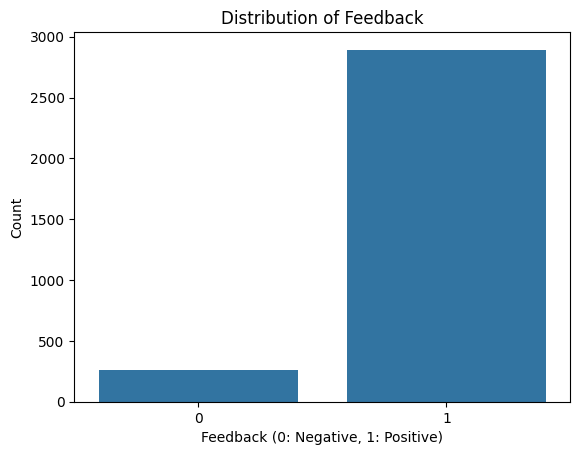

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='feedback', data=df)
plt.title('Distribution of Feedback')
plt.xlabel('Feedback (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

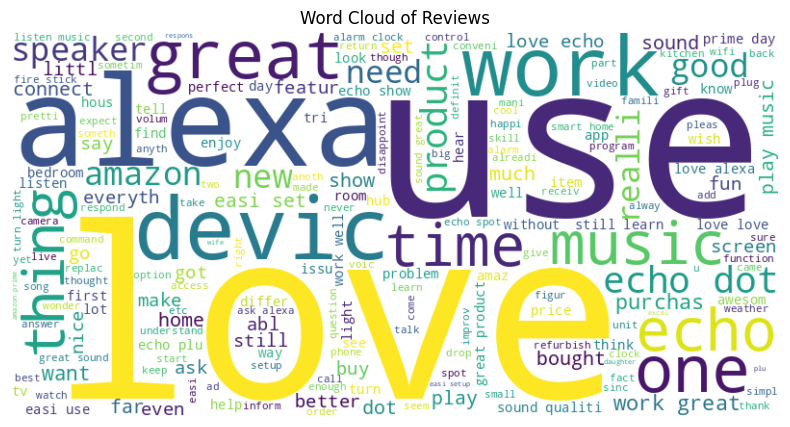

In [34]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['verified_reviews'].astype(str).tolist())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

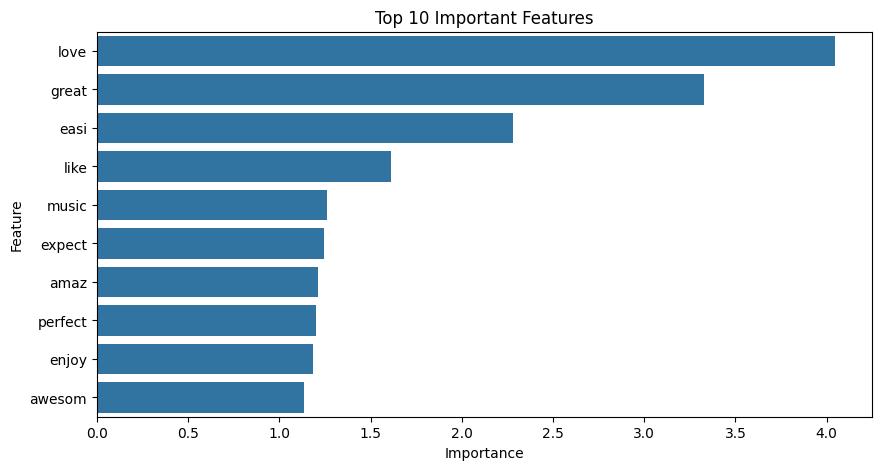

In [35]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9174603174603174

In [26]:
df.columns

Index(['verified_reviews', 'feedback'], dtype='object')

In [27]:
review = 'great sound quality'

In [28]:
review = stemming(review)

In [29]:
model.predict(vectorizer.transform([review]))

array([1])